In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math as m

In [2]:
df= pd.read_csv('S&P500_10.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,5/18/2009,886.070007,910.000000,886.070007,909.710022,5702150000
1,5/19/2009,909.669983,916.390015,905.219971,908.130005,6616270000
2,5/20/2009,908.619995,924.599976,901.369995,903.469971,8205060000
3,5/21/2009,900.419983,900.419983,879.609985,888.330017,6019840000
4,5/22/2009,888.679993,896.650024,883.750000,887.000000,5155320000


In [4]:
# make separate column for year, to plot yearly close prices
df['Date']= pd.to_datetime(df['Date'])
df['year']= df.Date.apply(lambda x:x.year)
df.head()
#df['month']= df.Date.apply(lambda x:x.month)
#df['day of month']= df.Date.apply(lambda x:x.day)

,Date,Open,High,Low,Close,Volume,year
0,2009-05-18,886.070007,910.000000,886.070007,909.710022,5702150000,2009
1,2009-05-19,909.669983,916.390015,905.219971,908.130005,6616270000,2009
2,2009-05-20,908.619995,924.599976,901.369995,903.469971,8205060000,2009
3,2009-05-21,900.419983,900.419983,879.609985,888.330017,6019840000,2009
4,2009-05-22,888.679993,896.650024,883.750000,887.000000,5155320000,2009


In [5]:
df['Date'][3]

Timestamp('2009-05-21 00:00:00')

year
2009    AxesSubplot(0.125,0.2;0.775x0.68)
2010    AxesSubplot(0.125,0.2;0.775x0.68)
2011    AxesSubplot(0.125,0.2;0.775x0.68)
2012    AxesSubplot(0.125,0.2;0.775x0.68)
2013    AxesSubplot(0.125,0.2;0.775x0.68)
2014    AxesSubplot(0.125,0.2;0.775x0.68)
2015    AxesSubplot(0.125,0.2;0.775x0.68)
2016    AxesSubplot(0.125,0.2;0.775x0.68)
2017    AxesSubplot(0.125,0.2;0.775x0.68)
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

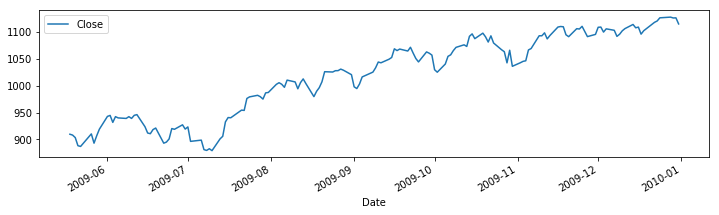

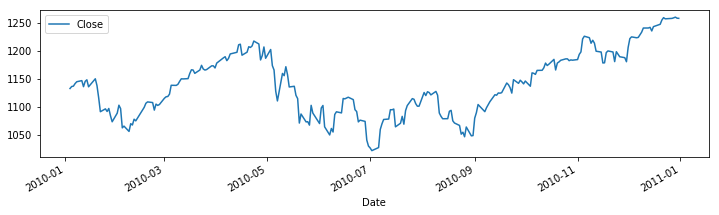

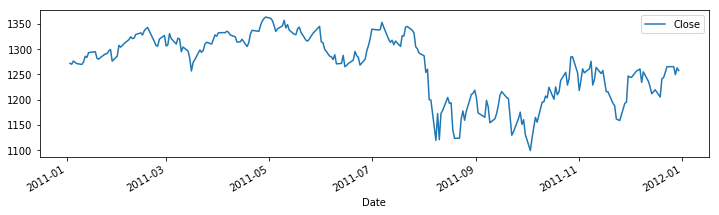

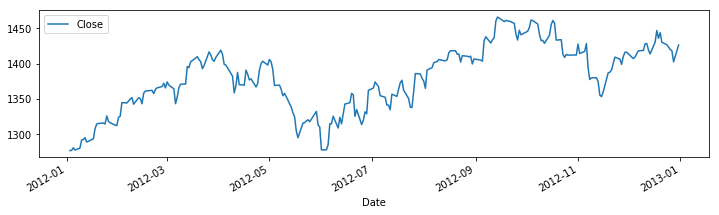

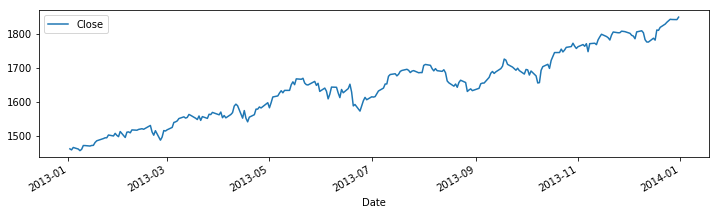

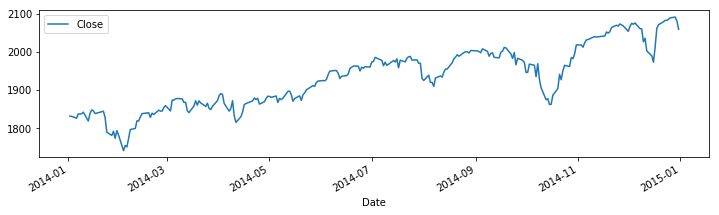

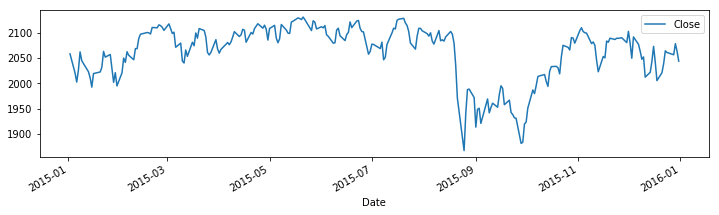

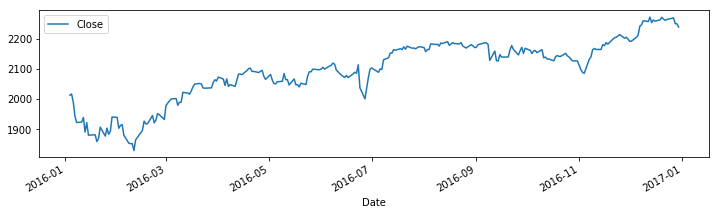

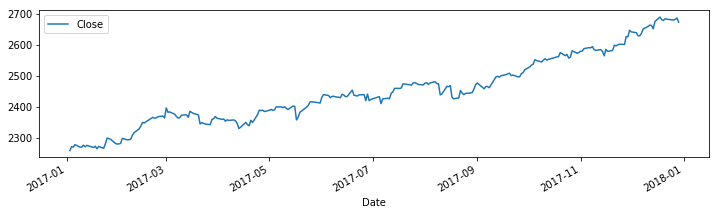

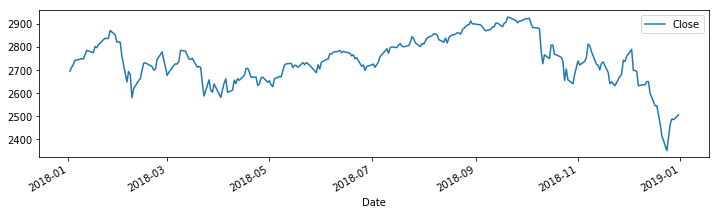

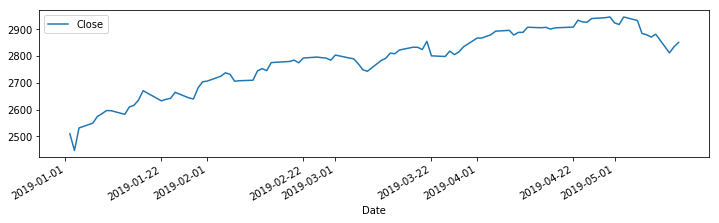

In [6]:
byyear= df.groupby('year')
byyear.plot(x='Date', y='Close', figsize= (12,3))

In [7]:
# DRAWDOWNS- 
#Drawdowns- a total loss over consecutive days from the last maximum
# to the next minimum of the price. A drawdown occuring over n days 
#(the period from t1 to tn) is described as d= (p_min-p_max)/p_max with 
# p_max= p(t1)>p(t2)>...>p(tn)= p_min

In [8]:
df['Close'].diff(-1)[3] # daily change


1.330016999999998

In [9]:
# this is where I want to find the difference between each close price, close[i]-close[i+1] 
# then denote -1 as p_min and +1 as p_max

pmin_pmax= (df['Close'].diff(-1)>0).astype(int).diff()

In [10]:
pmin_pmax[:10]

0    NaN
1    0.0
2    0.0
3    0.0
4   -1.0
5    1.0
6   -1.0
7    0.0
8    0.0
9    0.0
Name: Close, dtype: float64

In [11]:
# then create a list separating p_max and p_min
pmax= pmin_pmax[pmin_pmax==1]
pmin= pmin_pmax[pmin_pmax==-1]

In [12]:
pmin.index

Int64Index([   4,    6,   11,   14,   16,   21,   24,   28,   30,   32,
            ...
            2476, 2479, 2481, 2490, 2494, 2496, 2501, 2506, 2511, 2513],
           dtype='int64', length=644)

In [13]:
# use the pmax and pmin indices to determine if the intial pmin and the end pmax should
# be used in the calculation of drawdown

if pmin.index[0] < pmax.index[0]:
    pmin= pmin.drop(pmin.index[0])
if pmin.index[-1]< pmax.index[-1]:
    pmax= pmax.drop(pmax.index[-1])
    
# use the definition of drawdown to compute drawdowns, D
D= (np.array(df['Close'][pmin.index])- np.array(df['Close'][pmax.index]))/ np.array(df['Close'][pmax.index])

In [14]:
D[:15]

array([-0.01897116, -0.01373921, -0.0035227 , -0.00348033, -0.0375181 ,
       -0.0306004 , -0.00147783, -0.00853076, -0.02914455, -0.02131918,
       -0.00402183, -0.00038266, -0.00053428, -0.00715752, -0.00852186])

In [15]:
len(D)

643

In [ ]:
# I want to see how long the drawdown lasted, and this step calculates the duration of D

In [16]:
df['Date']= pd.to_datetime(df['Date']) 

In [17]:
duration=[np.busday_count(p1.date(), p2.date()) for p1, p2 in\
          zip(df['Date'][pmax.index], df['Date'][pmin.index])]

#d_start= df['Date'][pmax.index]
#d_end= df['Date'][pmin.index]

In [18]:
# this step is for the table below

dmap={'drawdown': D, 'duration': duration} #'d_start':d_start, 'd_end':d_end,\
df1= pd.DataFrame(dmap)
df1= df1.set_index(df['Date'][pmax.index])

In [19]:
df1.head()


,drawdown,duration
Date,,
2009-05-26,-0.018971,1
2009-06-02,-0.013739,1
2009-06-04,-0.003523,2
2009-06-09,-0.003480,1
2009-06-12,-0.037518,3


In [20]:
#df1['rank']=list(range(1, df1.shape[0]+1))

In [ ]:
# this might be unnecessary, but this figure below shows the durations for the drawdowns

([<matplotlib.axis.XTick at 0x291e1611f98>,
 <a list of 9 Text xticklabel objects>)

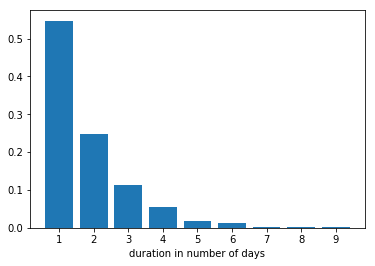

In [21]:
plt.bar(x=df1['duration'].value_counts().index, height= df1['duration'].value_counts()/df1['duration'].shape[0])
plt.xlabel('duration in number of days')
plt.xticks(df1['duration'].value_counts().index)

# the duration of drawdown show how long drawdowns typically last. for s&p500 ~50% of the drawdown
# lasted only one day, meaning that a price decrease from the previous to the current day is followed by 
# a price increase on the next following day.

In [ ]:
# from here onwards the crash like days calculation begins

In [22]:
# adding daily change, drawdown and duration of drawdown to the original dataset
df['Daily Change']= df['Close'].diff(1).fillna(0)
df['Drawdown']= df['Date'].map(df1['drawdown']).fillna(0)
df['Duration']= df['Date'].map(df1['duration']).fillna(0).astype(int)

In [23]:
df.head(10)

,Date,Open,High,Low,Close,Volume,year,Daily Change,Drawdown,Duration
0,2009-05-18,886.070007,910.000000,886.070007,909.710022,5702150000,2009,0.000000,0.000000,0
1,2009-05-19,909.669983,916.390015,905.219971,908.130005,6616270000,2009,-1.580017,0.000000,0
2,2009-05-20,908.619995,924.599976,901.369995,903.469971,8205060000,2009,-4.660034,0.000000,0
3,2009-05-21,900.419983,900.419983,879.609985,888.330017,6019840000,2009,-15.139954,0.000000,0
4,2009-05-22,888.679993,896.650024,883.750000,887.000000,5155320000,2009,-1.330017,0.000000,0
5,2009-05-26,887.000000,911.760010,881.460022,910.330017,5667050000,2009,23.330017,-0.018971,1
6,2009-05-27,909.950012,913.840027,891.869995,893.059998,5698800000,2009,-17.270019,0.000000,0
7,2009-05-28,892.960022,909.450012,887.599976,906.830017,5738980000,2009,13.770019,0.000000,0
8,2009-05-29,907.020020,920.020020,903.559998,919.140015,6050420000,2009,12.309998,0.000000,0
9,2009-06-01,923.260010,947.770020,923.260010,942.869995,6370440000,2009,23.729980,0.000000,0


In [24]:
# in this technique we will use duration as a measure of identifying crash 
# our threshold for duration will be more than two days

dur=2
def crash(x):
    if x>= dur:
        return 1
    else:
        return 0
df['Crash']= df['Duration'].apply(crash)

In [25]:
df.head(20)

,Date,Open,High,Low,Close,Volume,year,Daily Change,Drawdown,Duration,Crash
0,2009-05-18,886.070007,910.000000,886.070007,909.710022,5702150000,2009,0.000000,0.000000,0,0
1,2009-05-19,909.669983,916.390015,905.219971,908.130005,6616270000,2009,-1.580017,0.000000,0,0
2,2009-05-20,908.619995,924.599976,901.369995,903.469971,8205060000,2009,-4.660034,0.000000,0,0
3,2009-05-21,900.419983,900.419983,879.609985,888.330017,6019840000,2009,-15.139954,0.000000,0,0
4,2009-05-22,888.679993,896.650024,883.750000,887.000000,5155320000,2009,-1.330017,0.000000,0,0
5,2009-05-26,887.000000,911.760010,881.460022,910.330017,5667050000,2009,23.330017,-0.018971,1,0
6,2009-05-27,909.950012,913.840027,891.869995,893.059998,5698800000,2009,-17.270019,0.000000,0,0
7,2009-05-28,892.960022,909.450012,887.599976,906.830017,5738980000,2009,13.770019,0.000000,0,0
8,2009-05-29,907.020020,920.020020,903.559998,919.140015,6050420000,2009,12.309998,0.000000,0,0
9,2009-06-01,923.260010,947.770020,923.260010,942.869995,6370440000,2009,23.729980,0.000000,0,0


In [26]:
df[df['Crash']==1].count()

Date            291
Open            291
High            291
Low             291
Close           291
Volume          291
year            291
Daily Change    291
Drawdown        291
Duration        291
Crash           291
dtype: int64

In [27]:
lst= df[df['Crash']==1].index

In [28]:
for i in lst:
    print(df.iloc[i]['Date'])

2009-06-04 00:00:00
2009-06-12 00:00:00
2009-07-06 00:00:00
2009-07-27 00:00:00
2009-08-04 00:00:00
2009-08-07 00:00:00
2009-08-13 00:00:00
2009-08-27 00:00:00
2009-09-22 00:00:00
2009-09-28 00:00:00
2009-10-19 00:00:00
2009-10-22 00:00:00
2009-11-17 00:00:00
2009-11-25 00:00:00
2009-12-04 00:00:00
2010-01-19 00:00:00
2010-01-27 00:00:00
2010-02-02 00:00:00
2010-02-19 00:00:00
2010-03-17 00:00:00
2010-03-23 00:00:00
2010-04-23 00:00:00
2010-05-03 00:00:00
2010-05-12 00:00:00
2010-05-17 00:00:00
2010-05-27 00:00:00
2010-06-03 00:00:00
2010-06-18 00:00:00
2010-06-25 00:00:00
2010-07-26 00:00:00
2010-08-04 00:00:00
2010-08-09 00:00:00
2010-08-18 00:00:00
2010-09-03 00:00:00
2010-09-20 00:00:00
2010-09-28 00:00:00
2010-10-05 00:00:00
2010-11-05 00:00:00
2010-11-10 00:00:00
2010-11-19 00:00:00
2010-11-24 00:00:00
2010-12-29 00:00:00
2011-01-05 00:00:00
2011-01-18 00:00:00
2011-02-18 00:00:00
2011-03-03 00:00:00
2011-03-08 00:00:00
2011-03-11 00:00:00
2011-04-06 00:00:00
2011-04-21 00:00:00


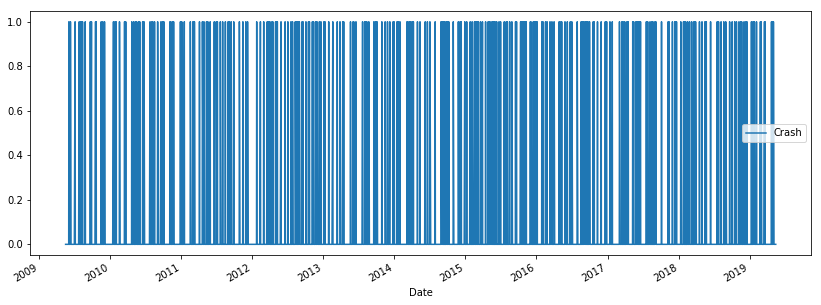

In [29]:
df.plot(x="Date", y="Crash", figsize=(14,5))

In [30]:
column_names=["Daily Change 1","Daily Change 2","Daily Change 3","Daily Change 4","Daily Change 5","Daily Change 6","Daily Change 7","Daily Change 8","Daily Change 9"]
rows_list=[]
for i in range(df.shape[0]-8):
    lst=[]
    for j in range(9): 
        lst.append(df["Daily Change"][i+j])
        
    dictionary = dict(zip(column_names, lst))
    rows_list.append(dictionary)
df3=pd.DataFrame(rows_list) 

In [31]:
df3.shape

(2508, 9)

In [32]:
df3.head()

,Daily Change 1,Daily Change 2,Daily Change 3,Daily Change 4,Daily Change 5,Daily Change 6,Daily Change 7,Daily Change 8,Daily Change 9
0,0.000000,-1.580017,-4.660034,-15.139954,-1.330017,23.330017,-17.270019,13.770019,12.309998
1,-1.580017,-4.660034,-15.139954,-1.330017,23.330017,-17.270019,13.770019,12.309998,23.729980
2,-4.660034,-15.139954,-1.330017,23.330017,-17.270019,13.770019,12.309998,23.729980,1.869995
3,-15.139954,-1.330017,23.330017,-17.270019,13.770019,12.309998,23.729980,1.869995,-12.979980
4,-1.330017,23.330017,-17.270019,13.770019,12.309998,23.729980,1.869995,-12.979980,10.700012


In [33]:
def has_crash(index):
    crash_count=0
    for i in range(index+9,index+18):
        if df["Crash"][i]==1:
            crash_count+=1
    if crash_count>1:
        return 1
    else:
        return 0

In [34]:
crash_day=[]

for i in range(df3.shape[0]-9):
    crash_day.append(has_crash(i))
for i in range(df3.shape[0]-9, df3.shape[0]): #    Entering 0 for the last 7 days  
    crash_day.append(0)
len(crash_day)

2508

In [35]:
df3['Target']= crash_day

In [36]:
df3.head(10)

,Daily Change 1,Daily Change 2,Daily Change 3,Daily Change 4,Daily Change 5,Daily Change 6,Daily Change 7,Daily Change 8,Daily Change 9,Target
0,0.000000,-1.580017,-4.660034,-15.139954,-1.330017,23.330017,-17.270019,13.770019,12.309998,0
1,-1.580017,-4.660034,-15.139954,-1.330017,23.330017,-17.270019,13.770019,12.309998,23.729980,1
2,-4.660034,-15.139954,-1.330017,23.330017,-17.270019,13.770019,12.309998,23.729980,1.869995,1
3,-15.139954,-1.330017,23.330017,-17.270019,13.770019,12.309998,23.729980,1.869995,-12.979980,1
4,-1.330017,23.330017,-17.270019,13.770019,12.309998,23.729980,1.869995,-12.979980,10.700012,0
5,23.330017,-17.270019,13.770019,12.309998,23.729980,1.869995,-12.979980,10.700012,-2.369995,0
6,-17.270019,13.770019,12.309998,23.729980,1.869995,-12.979980,10.700012,-2.369995,-0.950012,0
7,13.770019,12.309998,23.729980,1.869995,-12.979980,10.700012,-2.369995,-0.950012,3.289978,0
8,12.309998,23.729980,1.869995,-12.979980,10.700012,-2.369995,-0.950012,3.289978,-3.279969,0
9,23.729980,1.869995,-12.979980,10.700012,-2.369995,-0.950012,3.289978,-3.279969,5.739991,0


In [ ]:
# from here onwards the train test split and classification begins

In [37]:
X=df3.drop("Target",axis=1)
y=df3["Target"]

split_start=2000
split_index= 2300
split_end= 2500

X_train = X.loc[split_start:split_index]
X_test= X.loc[split_index:split_end]

y_train=y.loc[split_start:split_index]
y_test= y.loc[split_index:split_end]

In [38]:
print(sum(y_train==0),'\n',
sum(y_train==1))

215 
 86


In [39]:
print(sum(y_test==0),'\n',
sum(y_test==1))

150 
 51


In [40]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
# random forest

In [41]:
print("Random Forrest Results")
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Random Forrest Results
[[134  16]
 [ 44   7]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       150
           1       0.30      0.14      0.19        51

   micro avg       0.70      0.70      0.70       201
   macro avg       0.53      0.52      0.50       201
weighted avg       0.64      0.70      0.66       201



In [ ]:
# logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Logistic Regression Results
[[150   0]
 [ 51   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       150
           1       0.00      0.00      0.00        51

   micro avg       0.75      0.75      0.75       201
   macro avg       0.37      0.50      0.43       201
weighted avg       0.56      0.75      0.64       201



C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# table 2
print(df['Date'].iloc[200]) #  5 months training data, 1 months testing
print(df['Date'].iloc[300])
print(df['Date'].iloc[320])

In [ ]:
# table 3
print(df['Date'].iloc[350]) #  7 months training data, 2 months testing
print(df['Date'].iloc[500])
print(df['Date'].iloc[540])

In [ ]:
# table 4
print(df['Date'].iloc[450]) #  5... months training data, 2 months testing
print(df['Date'].iloc[555])
print(df['Date'].iloc[595])

In [ ]:
# table 5
print(df['Date'].iloc[490]) #  4 months training data, 1 months testing
print(df['Date'].iloc[575])
print(df['Date'].iloc[600])

In [ ]:
# table 6 for duration
print(df['Date'].iloc[700]) #  
print(df['Date'].iloc[765])
print(df['Date'].iloc[785])

In [ ]:
# no target=1 was obtained between 8/2014-12/2014, so table was not constructed
# table 6
print(df['Date'].iloc[700]) #  9 months training data, 3 months testing
print(df['Date'].iloc[890])
print(df['Date'].iloc[955])

In [ ]:
# table 7 for duration
print(df['Date'].iloc[785]) #  
print(df['Date'].iloc[915])
print(df['Date'].iloc[935])

In [ ]:
# table 7
print(df['Date'].iloc[800]) #  7 months training data, 2 months testing
print(df['Date'].iloc[950])
print(df['Date'].iloc[990])

In [ ]:
# table 8 for duration
print(df['Date'].iloc[950]) #  
print(df['Date'].iloc[990])
print(df['Date'].iloc[1005])

In [ ]:
# table 8
print(df['Date'].iloc[990]) #  5 months training data,1  months testing
print(df['Date'].iloc[1095])
print(df['Date'].iloc[1120])

In [ ]:
# table 9 for duration
print(df['Date'].iloc[1007]) # results are poor 
print(df['Date'].iloc[1095])
print(df['Date'].iloc[1135])

In [ ]:
# table 9
print(df['Date'].iloc[1120]) #  5 months training data,1  months testing
print(df['Date'].iloc[1225])
print(df['Date'].iloc[1250])

In [ ]:
# table 10 duration
print(df['Date'].iloc[1120]) #  
print(df['Date'].iloc[1185])
print(df['Date'].iloc[1210])

In [ ]:
# table 10
print(df['Date'].iloc[1175]) #  4 months training data,1...  months testing
print(df['Date'].iloc[1250])
print(df['Date'].iloc[1275])

In [ ]:
# table 11 duration
print(df['Date'].iloc[1210]) 
print(df['Date'].iloc[1265])
print(df['Date'].iloc[1285])

In [ ]:
# table 11, table 12 for duration
print(df['Date'].iloc[1199]) #   months training data,  months testing
print(df['Date'].iloc[1300])
print(df['Date'].iloc[1328])